In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
df=pd.read_csv('dataset_heart.csv')
df.head(5)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64


In [7]:
# Summary statistics
print(df.describe())


              age        sex   chest pain type  resting blood pressure  \
count  270.000000  270.000000       270.000000              270.000000   
mean    54.433333    0.677778         3.174074              131.344444   
std      9.109067    0.468195         0.950090               17.861608   
min     29.000000    0.000000         1.000000               94.000000   
25%     48.000000    0.000000         3.000000              120.000000   
50%     55.000000    1.000000         3.000000              130.000000   
75%     61.000000    1.000000         4.000000              140.000000   
max     77.000000    1.000000         4.000000              200.000000   

       serum cholestoral  fasting blood sugar  \
count         270.000000           270.000000   
mean          249.659259             0.148148   
std            51.686237             0.355906   
min           126.000000             0.000000   
25%           213.000000             0.000000   
50%           245.000000             0.

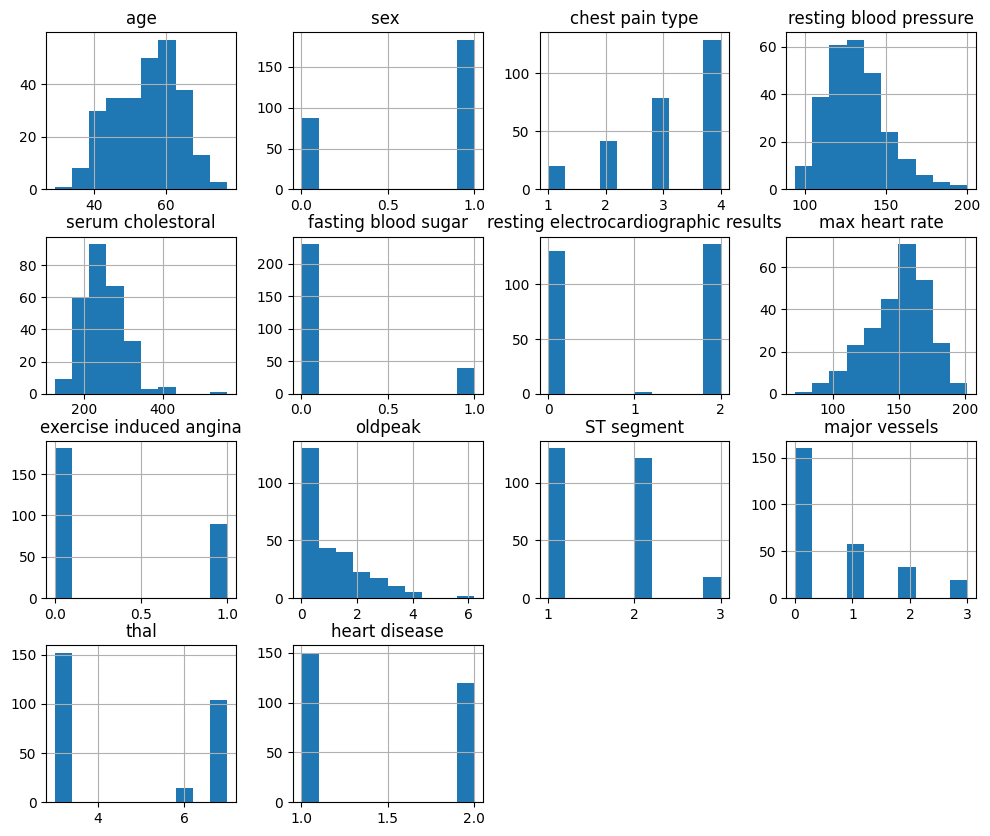

In [6]:
# Check data distribution
df.hist(figsize=(12, 10))
plt.show()

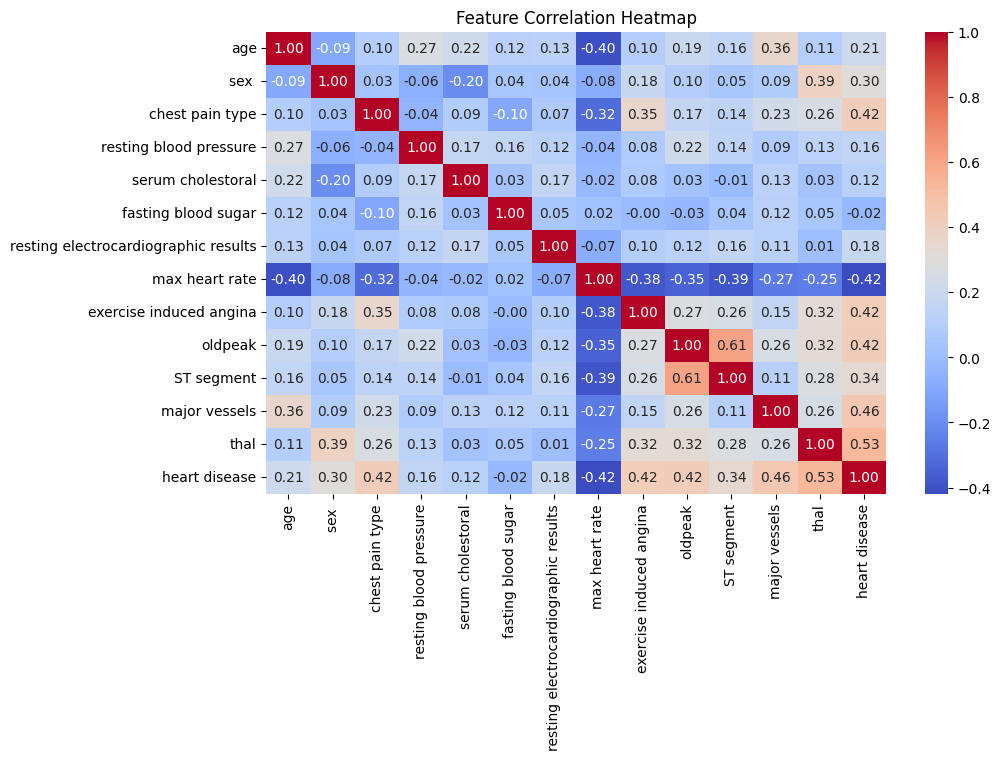

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Key Predictors of Heart Disease: Chest pain type, exercise-induced angina, oldpeak, major vessels, and thalassemia show strong correlations with heart disease, making them important features for prediction.

Negative Impact of Max Heart Rate: A lower maximum heart rate is negatively correlated with heart disease, indicating its potential as a key risk factor.

Multicollinearity Consideration: High correlations between features like oldpeak and ST segment may introduce redundancy, requiring careful feature selection or regularization techniques like Lasso Regression.

In [10]:
# Separate features and target variable
X = df.drop(columns=['heart disease'])
y = df['heart disease']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} rows")
print(f"Testing data size: {X_test.shape[0]} rows")

Training data size: 216 rows
Testing data size: 54 rows


In [11]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=3),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=3)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results[name] = [accuracy, precision, recall, roc_auc]

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "ROC-AUC"]).T
results_df

Model: Logistic Regression
              precision    recall  f1-score   support

           1       0.91      0.94      0.93        33
           2       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54

Confusion Matrix:
 [[31  2]
 [ 3 18]]
--------------------------------------------------
Model: KNN
              precision    recall  f1-score   support

           1       0.81      0.91      0.86        33
           2       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54

Confusion Matrix:
 [[30  3]
 [ 7 14]]
--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           1       0.86      0.94      0.90        33


,Accuracy,Precision,Recall,ROC-AUC
Logistic Regression,0.907407,0.911765,0.939394,0.898268
KNN,0.814815,0.810811,0.909091,0.787879
Random Forest,0.870370,0.861111,0.939394,0.850649
Gradient Boosting,0.740741,0.771429,0.818182,0.718615


Logistic Regression Performs Best: With 90.7% accuracy and 93.9% recall, it effectively classifies heart disease cases while minimizing false negatives.

Random Forest is a Strong Alternative: Offers 87.0% accuracy and 93.9% recall, making it a good choice with feature interpretability.

Gradient Boosting Underperforms: Lower accuracy (74.0%) and ROC-AUC (71.8%) suggest the need for further tuning or better preprocessing.

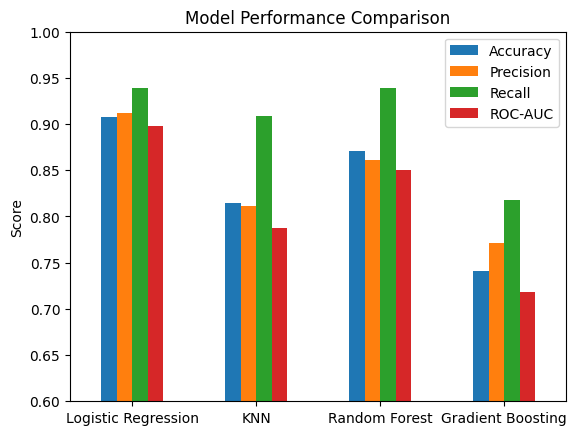

In [15]:
results_df.plot(kind="bar", rot=0)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim([0.6, 1])
plt.legend(loc="upper right")
plt.show()

The Model Performance Comparison chart evaluates four machine learning models (Logistic Regression, KNN, Random Forest, and Gradient Boosting) based on Accuracy, Precision, Recall, and ROC-AUC. Logistic Regression and Random Forest show balanced and strong performance across all metrics, with Random Forest having the highest recall. Gradient Boosting underperforms in comparison, especially in ROC-AUC, suggesting potential issues with generalization.

In [17]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=3), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy: 0.8430232558139534


Final Model Performance:
              precision    recall  f1-score   support

           1       0.83      0.91      0.87        33
           2       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54

Confusion Matrix:
 [[30  3]
 [ 6 15]]


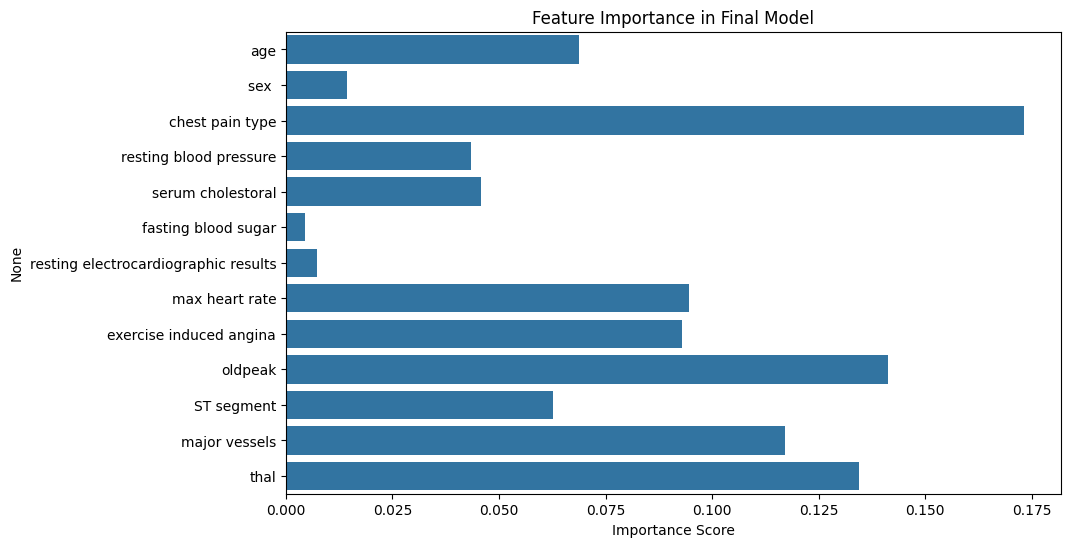

In [19]:
# Train best model from Grid Search
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_final = best_rf.predict(X_test)

print("Final Model Performance:")
print(classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

# Plot feature importance
importances = best_rf.feature_importances_
feature_names = df.drop(columns=['heart disease']).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Final Model")
plt.xlabel("Importance Score")
plt.show()

Model Performance: The model achieves 83% accuracy, but recall for heart disease cases is lower (71%), indicating some missed diagnoses (false negatives).

Key Predictors: Chest pain type, thalassemia, major vessels, oldpeak, and exercise-induced angina are the most influential features in predicting heart disease.

Potential Improvements: Improving recall by tuning thresholds, balancing the dataset, or using ensemble methods could enhance the model's ability to detect heart disease cases.